Recta ajustada: T = 217.7723 * ΔL + -1.1069
Coeficiente de determinación R² = 0.9057


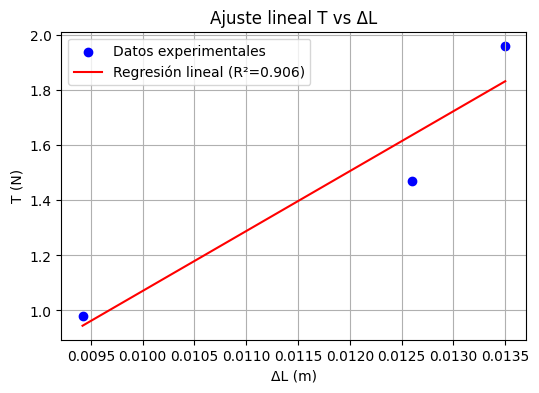


Pendiente m = 217.7723 N/m
Módulo de Young E = 5.96e+06 Pa


In [15]:
import numpy as np
from sklearn.linear_model import LinearRegression
import math
import matplotlib.pyplot as plt

def calcular_m(delta_L, T):
    """
    Realiza una regresión lineal T = m * ΔL + b,
    devuelve la pendiente m y el coeficiente R^2.
    """
    X = np.array(delta_L).reshape(-1, 1)
    y = np.array(T)

    modelo = LinearRegression()
    modelo.fit(X, y)

    m = modelo.coef_[0]
    b = modelo.intercept_
    r2 = modelo.score(X, y)

    print(f"Recta ajustada: T = {m:.4f} * ΔL + {b:.4f}")
    print(f"Coeficiente de determinación R² = {r2:.4f}")
    
    # Graficar datos y regresión
    plt.figure(figsize=(6,4))
    plt.scatter(delta_L, T, color='blue', label='Datos experimentales')
    plt.plot(delta_L, modelo.predict(X), color='red', label=f'Regresión lineal (R²={r2:.3f})')
    plt.xlabel("ΔL (m)")
    plt.ylabel("T (N)")
    plt.title("Ajuste lineal T vs ΔL")
    plt.legend()
    plt.grid(True)
    plt.show()

    return m, r2

def calcular_E(m, L0, d):
    """
    Calcula el módulo de Young E = 4 m L0 / (π d^2)
    """
    E = (4 * m * L0) / (math.pi * d**2)
    return E

# =============================
# EJEMPLO CON 3 PARES DE DATOS
# =============================
delta_L = [0.00942,0.0126 ,0.0135]   # elongaciones (m)
T = [0.981,1.4715 ,1.962]             # tensiones (N)

# Longitud inicial y diámetro de la cuerda
L0 = 0.2      # metros
d = 0.00305    # metros

m, r2 = calcular_m(delta_L, T)
E = calcular_E(m, L0, d)

print(f"\nPendiente m = {m:.4f} N/m")
print(f"Módulo de Young E = {E:.2e} Pa")


In [3]:
!pip install scikit-learn


  Using cached scikit_learn-1.7.2-cp313-cp313-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (11 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 11.2 MB/s eta 0:00:0031m11.7 MB/s eta 0:00:01
Using cached threadpoolctl-3.6.0-py3-none-any.whl (18 kB)
